# Business Question

What are the effects of discounts on sales and revenue? 

# Data-Preparation

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Importing cleaned data

In [2]:
brands = pd.read_csv(R'cleaned_data\brands_cleaned.csv')
orderlines = pd.read_csv(R'cleaned_data\orderlines_cleaned.csv')
orders = pd.read_csv(R'cleaned_data\orders_cleaned.csv')
products = pd.read_csv(R'cleaned_data\products_cleaned.csv')

## Categorization of products

Value Counts and corresponding Categories for "type" column:

<pre>
11865403    1092    --> Mostly Cases
12175397    1087    --> Mostly Network Storage
1298         836    --> "Open" products
11935397     568    --> Hard Drives and Accessories
11905404     474    --> Phone Accessories
1282         374    --> Apple Computers (iMacs and MacBooks)
12635403     369    --> iPad Accessories
13835403     270    --> MacBook Accessories
5,74E+15     247
1,44E+11     234
1364         220    --> Mac RAM
1433         215    --> SSDs
12585395     190    --> Adapters
1296         188    --> Monitors
1325         184    --> Cables
5384         181    --> Headphones
12215397     177    --> SSDs
5398         160    --> Speakers
1,02E+12     159
57445397     141    --> Memory cards (e.g. sd-cards etc.)
1334         135    --> Routers and switches
1229         108    --> Stylus pens
2158         107    --> MacBook Pro
12655397     107    --> Harddrives
2449         107    --> Apple Watch Accessories
12995397      97    --> Mixed Accessories
1515          88    --> External batteries and powerpacks
13615399      78    --> Chargers
1405          77    --> Graphics Tablets
13555403      75    --> Phone Screen Protectors


11865403            --> Phone Cases and other Accessories
1216                --> iPad Accessories
12355400            --> Misc Accessories
<pre>

In [3]:
# Convert datatypes for some columns

products['type'] = products['type'].astype(str)
products['desc'] = products['desc'].astype(str)

# Regex-Patterns for different categories
iphone = R"^(?=.*\b(apple iphone)\b)(?!.*\b(repair|case|plan|service)\b).*$"
imac = R"^(?=.*\b(apple imac|apple mac pro| apple mac mini)\b)(?!.*\b(repair|case|plan|service|ram|keyboard|mouse|mhz|macbook)\b).*$"
macbook = R"^(?=.*\b(apple macbook)\b)(?!.*\b(repair|case|plan|service|keyboard|mouse)\b).*$"
macbook_type = R"2158"
ipad = R"^(?=.*\b(apple ipad)\b)(?!.*\b(repair|case|plan|service)\b).*$"
ipod_type = R"11821715"
monitor = R"^(?=.*\b(monitor|display)\b)(?!.*\b(repair|case|plan|service)\b).*$"
monitor_type = R"1296"
watch = R"^(?=.*\b(watch)\b)(?!.*\b(repair|case|plan|service)\b).*$"
accessories = R"^(?=.*\b(keyboard|mouse|headphones|docking station|dock|case|adapter|cable)\b)(?!.*\b(repair|plan|service)\b).*$"
accessories_type = R"11905404|12635403|13835403|12585395|1325|5384|5398|1229|2449|12995397|1515|13615399|13555403|11865403|1216|12355400"
storage_type = R"12175397|11935397|1433|12215397|57445397|12655397"
storage_name = R"^(?=.*\b(hard\s?drive|storage|harddisk|HDD|SSD)\b)(?!.*\b(repair|case|plan|service|macbook|imac|installation|mac)\b).*$"
memory = R"^(?=\b(memory|RAM|MHz)\b)(?!\b(repair|case|plan|service|macbook|imac|installation|mac)\b)$"
memory_type = R"1364"
network_type = R"1334"
graphics_tablet_type = R"1405"
services = R"^repair|service$"
services = R"^(?=.*\b(repair|service)\b).*$"
open_type = R"1298"

# Definition of conditions for new column "prod_cat"
conditions = [
    products['name'].str.match(iphone, flags=re.IGNORECASE),                         # iPhone
    products['desc'].str.match(iphone, flags=re.IGNORECASE),                         # iPhone
    products['name'].str.match(imac, flags=re.IGNORECASE),                           # iMac
    products['name'].str.match(macbook, flags=re.IGNORECASE),                        # MacBook
    products['desc'].str.match(macbook, flags=re.IGNORECASE),                        # MacBook
    products['type'].str.match(macbook_type, flags=re.IGNORECASE),                   # MacBook
    products['name'].str.match(ipad, flags=re.IGNORECASE),                           # iPad
    products['desc'].str.match(ipad, flags=re.IGNORECASE),                           # iPad
    products['type'].str.match(ipod_type, flags=re.IGNORECASE),                      # iPod
    products['name'].str.match(monitor, flags=re.IGNORECASE),                        # Monitor
    products['desc'].str.match(monitor, flags=re.IGNORECASE),                        # Monitor
    products['type'].str.match(monitor_type, flags=re.IGNORECASE),                   # Monitor
    products['name'].str.match(watch, flags=re.IGNORECASE),                          # Watch
    products['desc'].str.match(watch, flags=re.IGNORECASE),                          # Watch
    products['name'].str.match(accessories, flags=re.IGNORECASE),                    # Accessories
    products['desc'].str.match(accessories, flags=re.IGNORECASE),                    # Accessories
    products['type'].str.match(accessories_type, flags=re.IGNORECASE),               # Accessories
    products['type'].str.match(storage_type, flags=re.IGNORECASE),                   # Storage
    products['name'].str.match(storage_name, flags=re.IGNORECASE),                   # Storage
    products['name'].str.match(memory, flags=re.IGNORECASE),                         # Memory
    products['desc'].str.match(memory, flags=re.IGNORECASE),                         # Memory
    products['type'].str.match(memory_type, flags=re.IGNORECASE),                    # Memory
    products['type'].str.match(network_type, flags=re.IGNORECASE),                   # Network
    products['type'].str.match(graphics_tablet_type, flags=re.IGNORECASE),           # Network
    products['name'].str.match(services, flags=re.IGNORECASE),                       # Services
    products['desc'].str.match(services, flags=re.IGNORECASE),                       # Services
    products['type'].str.match(open_type, flags=re.IGNORECASE),                      # Open
]

# Definition of categories for new column "prod_cat"
outputs = [
    'iPhone',
    'iPhone',
    'iMac',
    'MacBook',
    'MacBook',
    'MacBook',
    'iPad',
    'iPad',
    'iPod',
    'Monitor',
    'Monitor',
    'Monitor',
    'Watch',
    'Watch',
    'Accessory',
    'Accessory',
    'Accessory',
    'Storage',
    'Storage',
    'Memory',
    'Memory',
    'Memory',
    'Network',
    'Graphics Tablet',
    'Service',
    'Service',
    'Open'
]

# Creation of new column "prod_cat" based on previously defined conditions and categories
res = np.select(conditions, outputs, 'Other')
products['prod_cat'] = pd.Series(res)

# Check valuecounts of products in the different categories
print('Categories with number of products:\n\n', pd.Series(res).value_counts())

Categories with number of products:

 Accessory          4037
Storage            2263
Other               971
MacBook             514
Monitor             421
Open                394
iMac                387
Watch               317
iPhone              314
Service             267
iPad                238
Memory              220
Network             110
Graphics Tablet      68
iPod                 58
dtype: int64


## Creating "Main" Dataframe

In [5]:
# Create 'brand' column in products
products = products.assign(brand = lambda df: df['sku'].str[:3])
products = (
products
    .merge(
        brands, 
        how = 'left', 
        left_on = products.brand, 
        right_on = brands.short)
    .rename(columns = {'short': 'brand_short', 'long':'brand_long'})
    .drop(columns = ['brand', 'key_0'])
    )

products['brand_short'] = products['brand_short'].astype(str)

# merge orderlines, products and orders into table "main"
main = (orderlines
            .merge(
                products, 
                on='sku', )
                .merge(
                    orders, 
                    on='order_id'))

# create discount column
main['total_disc'] = (main['price'] - main['unit_price']) * main['product_quantity']
main['norm_total_price'] = main['price'] * main['product_quantity']

# remove unnecessary columns
main = main.drop(['id', 'product_id', 'sku', 'total_paid', 'check_orders_x', 'desc', 'type', 'brand_short', 'created_date', 'check_orders_y'], axis=1)

# remove rows with missing prices
main = main[main.price.notnull()]
main = main[main.state == 'Completed']

# add disc_perc column which represents the percentage of the discount compared to the total price of one unit
main = main.assign(disc_perc= lambda df: 100 - ((df.unit_price / df.price) * 100))

# rename and reorder some columns
main = main.rename(columns={"unit_price": "disc_unit_price", "price": "norm_unit_price", "brand_long": "brand", "product_quantity": "qty", "total_price": "disc_total_price"})
cols = ['order_id','date','name','brand','prod_cat','qty','norm_unit_price','norm_total_price','disc_unit_price','disc_total_price','total_disc','disc_perc', 'state',]
main = main[cols]

# replace norm_unit_price with nan if norm_unit_price < disc_unit_price; then drop nan
main = main.assign(norm_unit_price = lambda df: np.where(df.norm_unit_price < df.disc_unit_price, np.nan, df.norm_unit_price))
main.dropna(inplace=True)

# add price-category column 
main['price_category'] = pd.cut(main.norm_unit_price,
        [0, 50, 200, 500, np.inf],
        labels = ['cheap', 'medium', 'expensive', 'very_expensive'])

# convert date to datetime object
main['date'] = pd.to_datetime(main['date'])

## Set global visualisation settings

In [6]:
params = {'legend.fontsize': 'large',
        'axes.labelsize': 'large',
        'axes.titlesize':'large',
        'xtick.labelsize':'large',
        'ytick.labelsize':'large',
        'savefig.transparent': True}
plt.rcParams.update(params)

# Visualisations

## General Plots

### Distribution of product prices across different product-categories

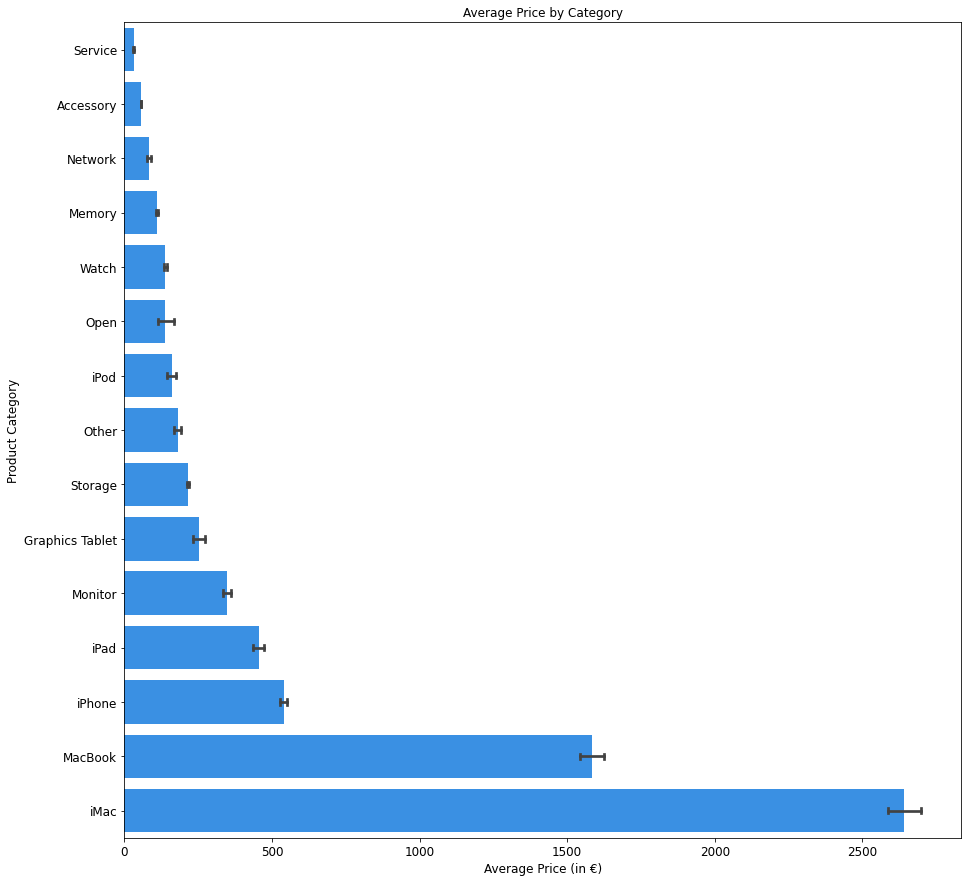

In [12]:
avg_price_per_cat = (
main
    .groupby('prod_cat')
    .agg(avg_price = ('disc_unit_price', 'mean'))
    .sort_values(by = 'avg_price')
    .reset_index()
)

# plot
plt.subplots(figsize =(15,15))
sns.barplot(data= main, 
            x='disc_unit_price', 
            y='prod_cat',
            estimator = np.mean,
            ci=95,
            order= avg_price_per_cat['prod_cat'],
            color='dodgerblue',
            capsize= 0.1
            )

plt.title('Average Price by Category')
plt.xlabel('Average Price (in €)')
plt.ylabel('Product Category')
plt.savefig(R'visualisations\general\prod_prices_across_prod_cat.svg')
plt.show()

### Percentage of products being discounted

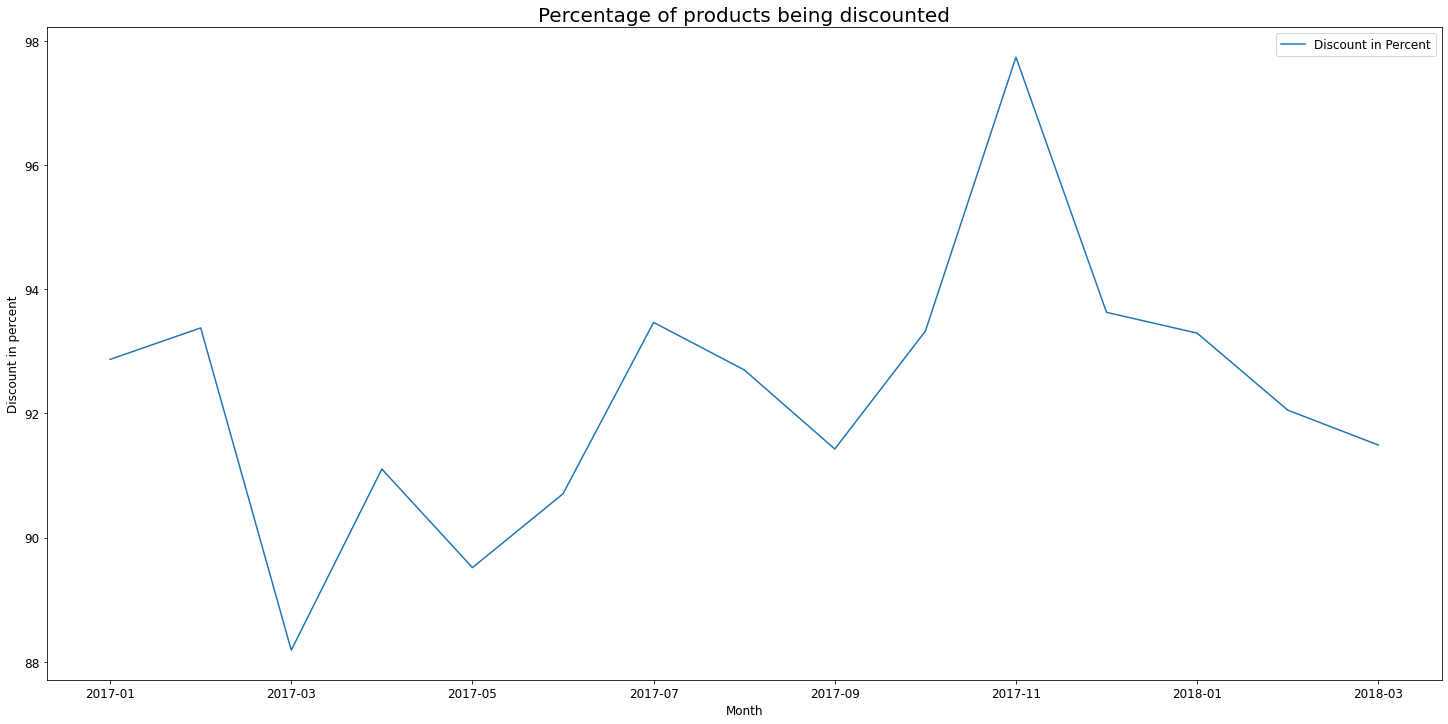

In [18]:
perc_prod_disc = (
main
    .assign(yearmonth = main['date'].dt.strftime('%Y-%m'))
    .assign(disc = main.total_disc > 0)
    .assign(no_disc = main.total_disc <= 0)
    .groupby(['yearmonth'])
    .agg({'disc':'sum', 'no_disc':'sum'})
    .reset_index()
)

perc_prod_disc['disc_percent'] = perc_prod_disc['disc'] / (perc_prod_disc['disc'] + perc_prod_disc['no_disc']) * 100

fig, ax = plt.subplots(figsize=(25, 12))

perc_prod_disc.plot(
    x='yearmonth', 
    y='disc_percent',
    ax = ax
)

plt.xlabel('Month') 
plt.ylabel('Discount in percent') 
plt.legend(['Discount in Percent'])
plt.title('Percentage of products being discounted', fontsize = 20) 
plt.ticklabel_format(style='plain', axis='y') 
plt.savefig(R'visualisations\general\perc_prod_disc.svg')
plt.show()

## Discounts as percentage of price

### grouped by categories

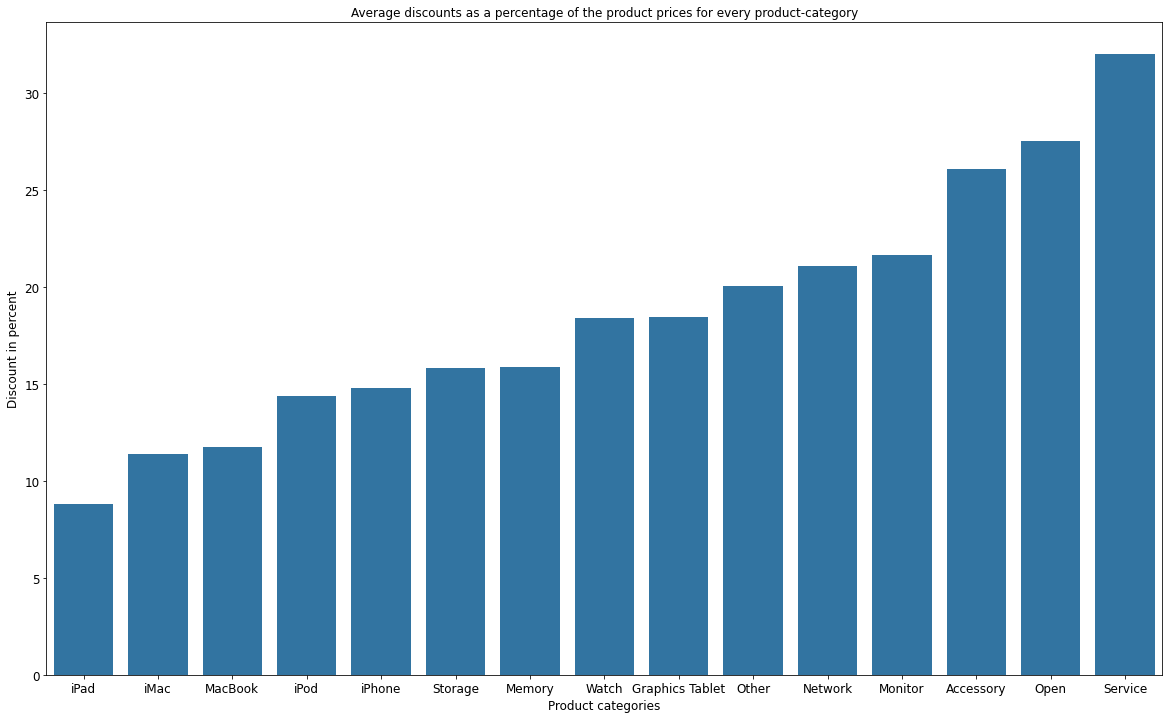

In [28]:
tmp_df = (
main
    .groupby('prod_cat')
    .agg({'disc_perc': 'mean'})
    .reset_index()
    .sort_values('disc_perc')
)

fig, ax = plt.subplots(figsize=(20, 12))

p = sns.barplot(
    data=tmp_df, 
    x='prod_cat',
    y='disc_perc', 
    color='tab:blue'
)

plt.xlabel('Product categories') 
plt.ylabel('Discount in percent') 
plt.title('Average discounts as a percentage of the product prices for every product-category') 
plt.ticklabel_format(style='plain', axis='y') 
plt.savefig(R'visualisations\discount_percent_of_price\disc_perc_by_prodcat.svg')
plt.show() 

### grouped by 5 biggest brands (sorted by most products sold, descending from left to right)

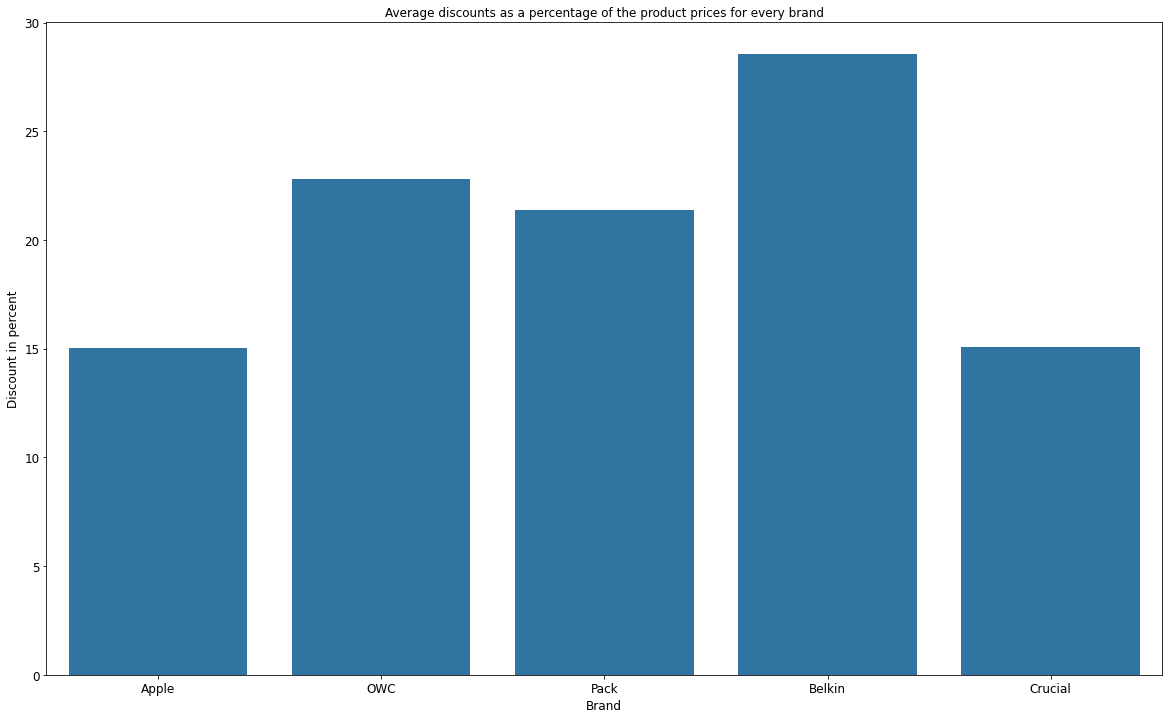

In [29]:
tmp_df = (
main
    .groupby('brand')
    .agg({'disc_perc': 'mean'})
    .reset_index()
    .sort_values('disc_perc')
)

brand_list = ['Apple', 'OWC', 'Pack', 'Belkin', 'Crucial']
tmp_df = tmp_df.loc[tmp_df['brand'].isin(brand_list)]

fig, ax = plt.subplots(figsize=(20, 12))

p = sns.barplot(
    data=tmp_df, 
    x='brand',
    y='disc_perc', 
    color='tab:blue',
    order = brand_list
)

plt.xlabel('Brand') 
plt.ylabel('Discount in percent') 
plt.title('Average discounts as a percentage of the product prices for every brand') 
plt.savefig(R'visualisations\discount_percent_of_price\disc_perc_by_brand.svg')
plt.show() 

### grouped by price category

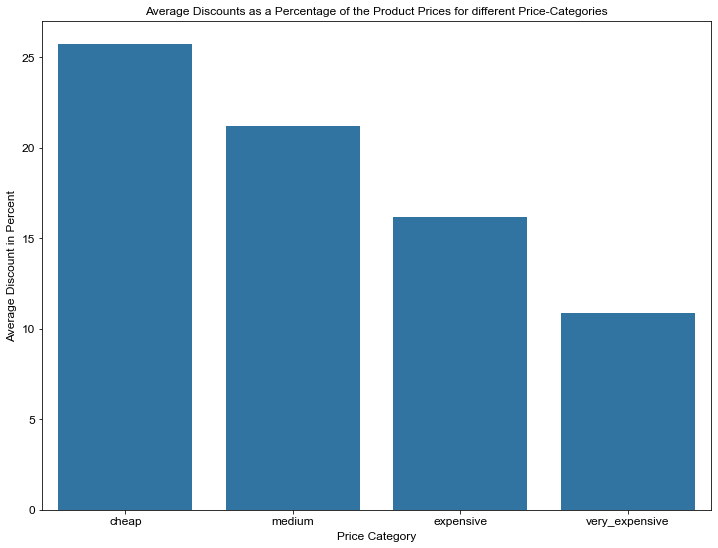

In [30]:
tmp_df = (
main
    .groupby('price_category')
    .agg({'disc_perc': 'mean'})
    .reset_index()
    .sort_values('disc_perc')
)

fig, ax = plt.subplots(figsize=(12, 9))

p = sns.barplot(
    data=tmp_df, 
    x='price_category', 
    y='disc_perc', 
    color='tab:blue'
)

sns.set()
plt.xlabel('Price Category') 
plt.ylabel('Average Discount in Percent') 
plt.title('Average Discounts as a Percentage of the Product Prices for different Price-Categories') 
plt.savefig(R'visualisations\discount_percent_of_price\disc_perc_by_pricecat.svg')
plt.show()

### grouped by price-category over time

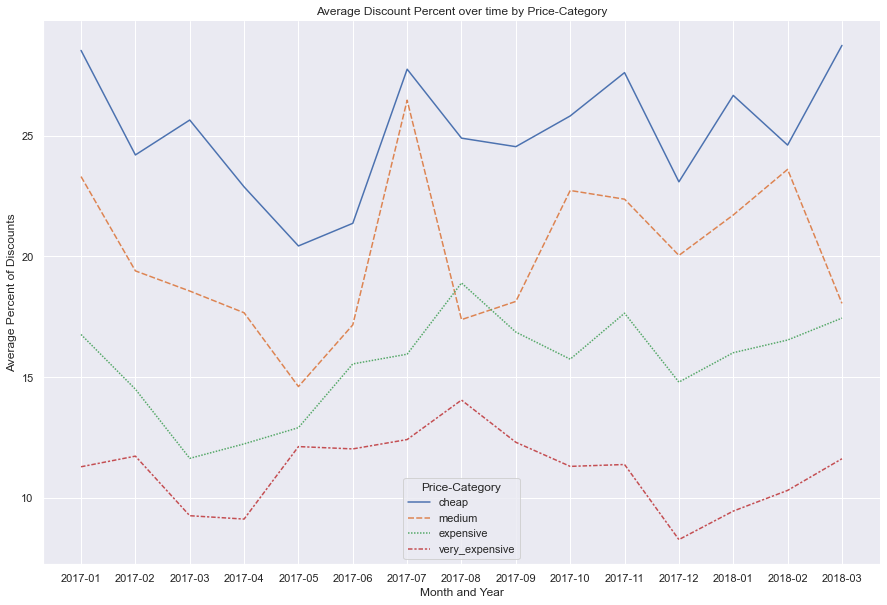

In [32]:
tmp_df = (
main
    .assign(yearmonth = lambda df: df['date'].dt.strftime('%Y-%m'))
    .groupby(['yearmonth', 'price_category'])
    .agg(avg_disc_perc = ('disc_perc', 'mean'))
    .reset_index()
    .pivot(index= 'yearmonth', columns= 'price_category', values = 'avg_disc_perc')
)

plt.subplots(figsize=(15, 10))

sns.lineplot(
    data= tmp_df,
)

plt.xlabel('Month and Year')
plt.ylabel('Average Percent of Discounts')
plt.title('Average Discount Percent over time by Price-Category')
plt.legend(title = 'Price-Category')
sns.despine() 
plt.savefig(R'visualisations\discount_percent_of_price\disc_perc_by_pricecat_over_time.svg')
plt.show()

## Revenue

### Total Revenue vs Total Discounts

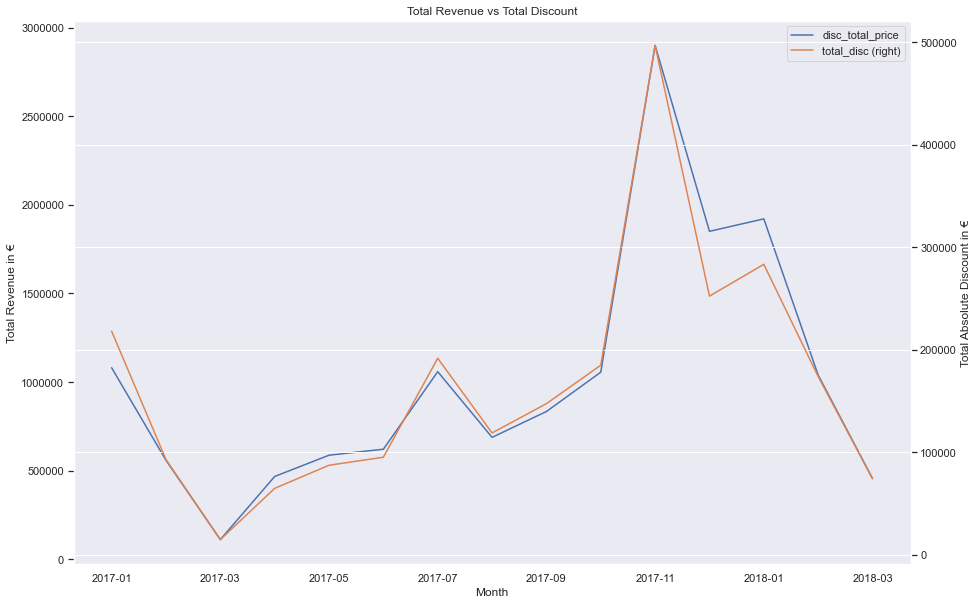

In [33]:
tmp_df = (
main
    .assign(yearmonth = main['date'].dt.strftime('%Y-%m'))
    .groupby(['yearmonth'])
    .agg({'disc_total_price':'sum', 'total_disc': 'sum'})
    .reset_index()
)

fig, ax = plt.subplots(figsize=(15, 10))

tmp_df.plot(
    x='yearmonth',
    y='disc_total_price',
    ax=ax
)

tmp_df.plot(
    x='yearmonth',
    y='total_disc',
    ax = ax, 
    secondary_y = True 
)

sns.set()
plt.title('Total Revenue vs Total Discount') 
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue in €')
plt.ylabel('Total Absolute Discount in €')
ax.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='y') 
plt.savefig(R'visualisations\revenue\revenue_vs_discounts.svg')
plt.show()

### Total Revenue vs Percentage of Discounted Products

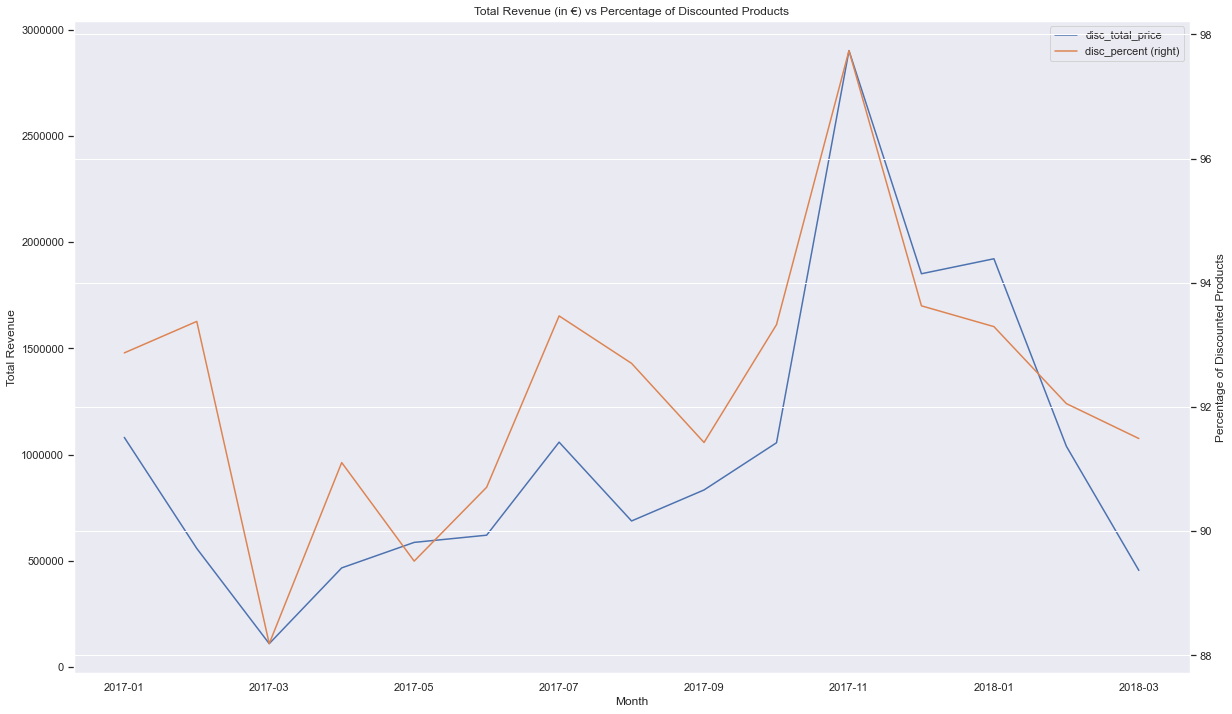

In [36]:
tmp_df = (
main
    .assign(yearmonth = main['date'].dt.strftime('%Y-%m'))
    .assign(disc = main.total_disc > 0)
    .assign(no_disc = main.total_disc <= 0)
    .groupby(['yearmonth'])
    .agg({'disc':'sum', 'no_disc':'sum', 'disc_total_price':'sum'})
    .reset_index()
)

tmp_df['disc_percent'] = (tmp_df['disc'] / (tmp_df['disc'] + tmp_df['no_disc'])) * 100


fig, ax = plt.subplots(figsize=(20, 12))

tmp_df.plot(
    x='yearmonth', 
    y='disc_total_price',
    ax=ax
)

tmp_df.plot(
    x='yearmonth', 
    y='disc_percent', 
    ax = ax, 
    secondary_y = True 
)

ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')
ax.ticklabel_format(style='plain', axis='y')
plt.title('Total Revenue (in €) vs Percentage of Discounted Products') 
plt.xlabel('Time (Year and Month)')
plt.ylabel('Percentage of Discounted Products')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig(R'visualisations\revenue_vs_percentage_discounted_products.svg')
plt.show()

## Seasonality

### Black Friday

#### Ratio of discounted/total products sold vs total products sold

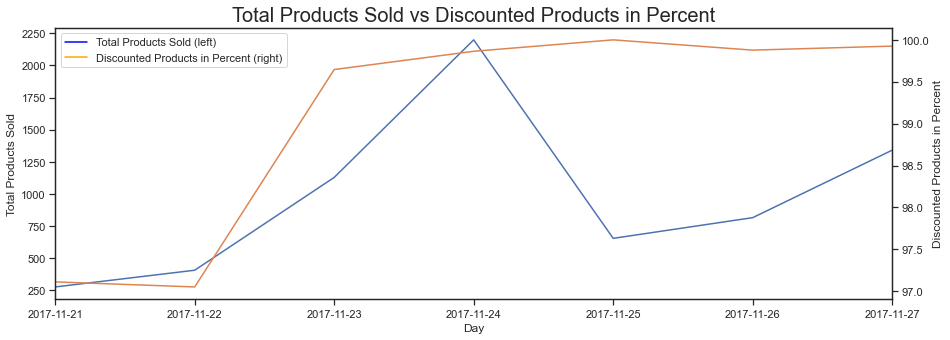

In [39]:
import matplotlib.lines as mlines

# prepare data for plotting
black_friday = (
main
    .assign(year_month_day = lambda df: df['date'].dt.strftime('%Y-%m-%d'),
            is_disc = lambda df: np.where(df['total_disc'] > 0, True, False))
    .groupby(['year_month_day'])
    .agg(total_sold= ('order_id', 'count'), disc_count = ('is_disc', 'sum'))
    .reset_index()
    .assign(disc_count_rel = lambda df: (df['disc_count'] / df['total_sold']) * 100)
)

black_friday = black_friday[black_friday['year_month_day'].isin(['2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24', '2017-11-25', '2017-11-26', '2017-11-27'])]

# create plot
fig, ax = plt.subplots(figsize=(15, 5))

line1 = black_friday.plot(
    x='year_month_day',
    y='total_sold',
    ax = ax,
)

line2 = black_friday.plot(
    x='year_month_day',
    y='disc_count_rel',
    ax = ax, 
    secondary_y = True
)

sns.set(style= 'ticks')
ax.set_xlabel('day')
ax.set_xlabel('Day')
ax.set_ylabel('Total Products Sold')
plt.title('Total Products Sold vs Discounted Products in Percent', fontsize = 20) 
plt.ylabel('Discounted Products in Percent')
plt.ticklabel_format(style='plain', axis='y')
ax.margins(x=0)

# manually label legend
ax.get_legend().remove()
blue_line = mlines.Line2D([], [], color='blue')
orange_line = mlines.Line2D([], [], color='orange')
plt.legend(handles=[blue_line, orange_line], labels=['Total Products Sold (left)', 'Discounted Products in Percent (right)'])
plt.savefig(R'visualisations\seasonality\black_friday\disc_by_total_prods_sold_vs_total_sold.svg')
plt.show()

#### Discount degree vs total products sold

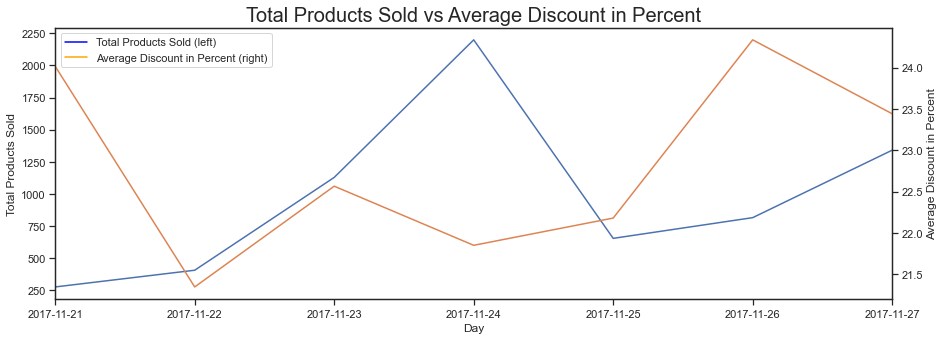

In [40]:
# prepare data for plotting
black_friday = (
main
    .assign(year_month_day = lambda df: df['date'].dt.strftime('%Y-%m-%d'))
    .groupby(['year_month_day'])
    .agg(total_sold= ('order_id', 'count'), avg_disc_percent = ('disc_perc', 'mean'))
    .reset_index()
)

black_friday = black_friday[black_friday['year_month_day'].isin(['2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24', '2017-11-25', '2017-11-26', '2017-11-27'])]

# create plot
fig, ax = plt.subplots(figsize=(15, 5))

line1 = black_friday.plot(
    x='year_month_day',
    y='total_sold',
    ax=ax
)

line2 = black_friday.plot(
    x='year_month_day',
    y='avg_disc_percent',
    ax = ax, 
    secondary_y = True
)

sns.set(style= 'ticks')
ax.set_xlabel('day')
plt.title('Total Products Sold vs Average Discount in Percent', fontsize = 20) 
ax.set_xlabel('Day')
ax.set_ylabel('Total Products Sold')
plt.ylabel('Average Discount in Percent')
plt.ticklabel_format(style='plain', axis='y')
ax.margins(x=0)

# manually label legend
ax.get_legend().remove()
blue_line = mlines.Line2D([], [], color='blue')
orange_line = mlines.Line2D([], [], color='orange')
plt.legend(handles=[blue_line, orange_line], labels=['Total Products Sold (left)', 'Average Discount in Percent (right)'])

plt.savefig(R'visualisations\seasonality\black_friday\disc_degree_vs_total_sold.svg')
plt.show() # show the plot

#### Total revenue vs total discounts

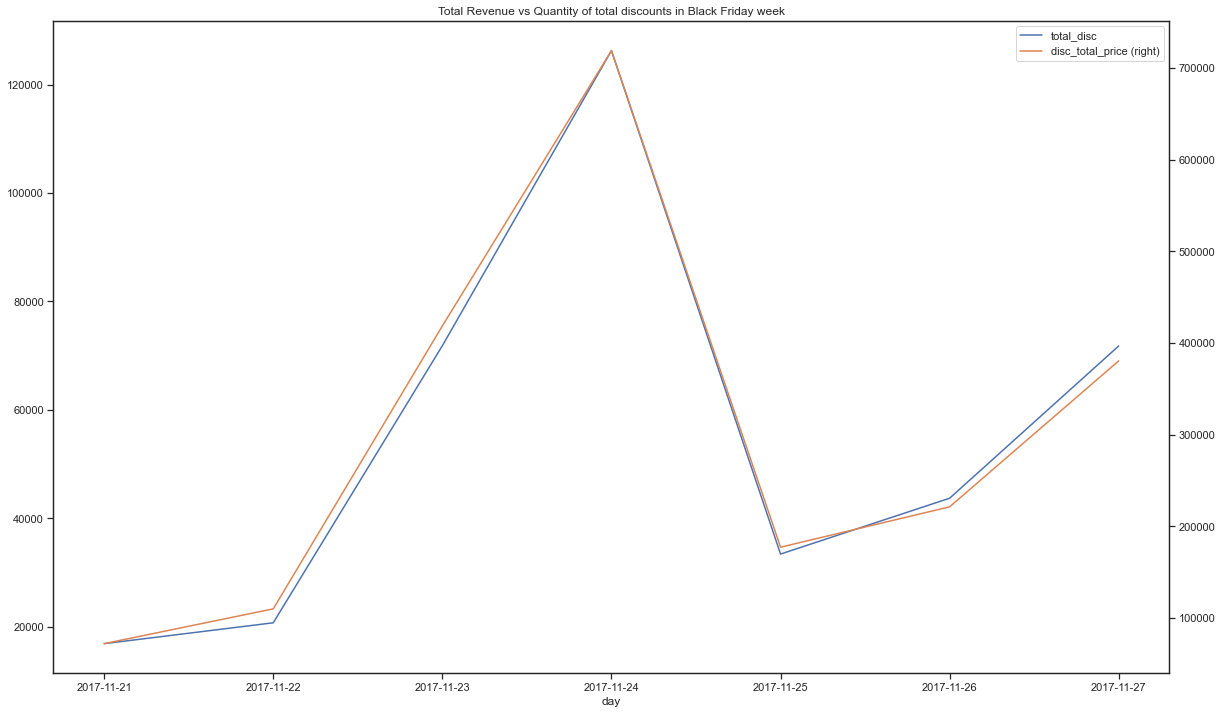

In [42]:
black_friday = (
main
    .assign(year_month_day = lambda df: df['date'].dt.strftime('%Y-%m-%d'),
            is_disc = lambda df: np.where(df['total_disc'] > 0, True, False))
    .groupby(['year_month_day'])
    .agg({'disc_total_price':'sum', 'total_disc': 'sum'})
    .reset_index()
)

black_friday = black_friday[black_friday['year_month_day'].isin(['2017-11-21', '2017-11-22', '2017-11-23', '2017-11-24', '2017-11-25', '2017-11-26', '2017-11-27'])]

# create plot
fig, ax = plt.subplots(figsize=(20, 12))

black_friday.plot(
    x='year_month_day',
    y='total_disc',
    ax=ax
)

black_friday.plot(
    x='year_month_day',
    y='disc_total_price',
    ax = ax, 
    secondary_y = True
)

ax.set_xlabel('day')

plt.title('Total Revenue vs Quantity of total discounts in Black Friday week')
plt.ticklabel_format(style='plain', axis='y') 
plt.savefig(R'visualisations\seasonality\black_friday\total_revenue_vs_total_discounts.svg')
plt.show() 

### Christmas

#### Ratio of discounted/total products sold vs total products sold

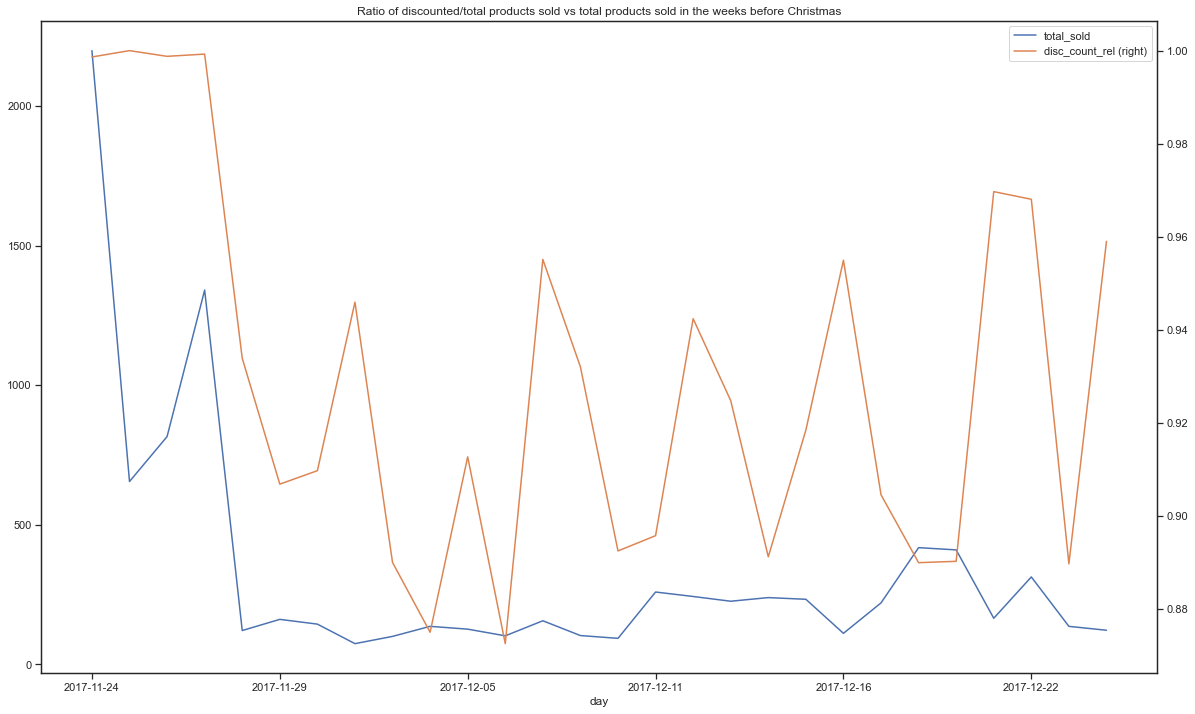

In [43]:
# prepare data for plotting
christmas = (
main
    .assign(year_month_day = lambda df: df['date'].dt.strftime('%Y-%m-%d'),
            is_disc = lambda df: np.where(df['total_disc'] > 0, True, False))
    .groupby(['year_month_day'])
    .agg(total_sold= ('order_id', 'count'), disc_count = ('is_disc', 'sum'))
    .reset_index()
    .assign(disc_count_rel = lambda df: df['disc_count'] / df['total_sold'])
)

christmas = christmas[christmas['year_month_day'].str.contains('2017-11-2[4-9]|2017-12-[0-1][1-9]|2017-12-2[1-4]')]

# create plot
fig, ax = plt.subplots(figsize=(20, 12))

christmas.plot(
    x='year_month_day',
    y='total_sold',
    ax=ax
)

christmas.plot(
    x='year_month_day',
    y='disc_count_rel',
    ax = ax, 
    secondary_y = True 
)

ax.set_xlabel('day')

plt.title('Ratio of discounted/total products sold vs total products sold in the weeks before Christmas') 
plt.ticklabel_format(style='plain', axis='y') 

plt.savefig(R'visualisations\seasonality\christmas\disc_by_total_prods_sold_vs_total_sold.svg')
plt.show() 

#### Total Revenue vs. Total Discounts

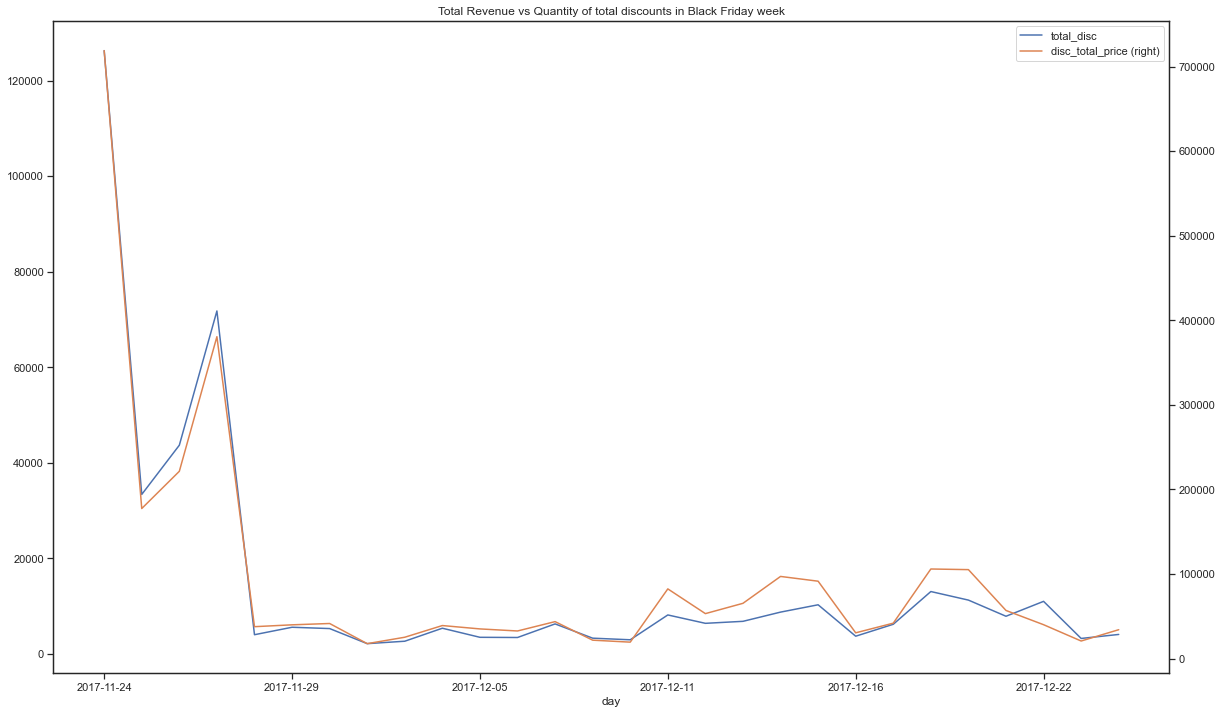

In [44]:
christmas = (
main
    .assign(year_month_day = lambda df: df['date'].dt.strftime('%Y-%m-%d'),
            is_disc = lambda df: np.where(df['total_disc'] > 0, True, False))
    .groupby(['year_month_day'])
    .agg({'disc_total_price':'sum', 'total_disc': 'sum'})
    .reset_index()
)

christmas = christmas[christmas['year_month_day'].str.contains('2017-11-2[4-9]|2017-12-[0-1][1-9]|2017-12-2[1-4]')]

# create plot
fig, ax = plt.subplots(figsize=(20, 12))

christmas.plot(
    x='year_month_day',
    y='total_disc',
    ax=ax
)

christmas.plot(
    x='year_month_day',
    y='disc_total_price',
    ax = ax, 
    secondary_y = True 
)

ax.set_xlabel('day')
plt.title('Total Revenue vs Quantity of total discounts in Black Friday week') 
plt.ticklabel_format(style='plain', axis='y') 

plt.savefig(R'visualisations\seasonality\christmas\total_rev_vs_total_discounts.svg')
plt.show()

## Apple Products

### Revenue from Apple Products vs Revenue from non-Apple Products

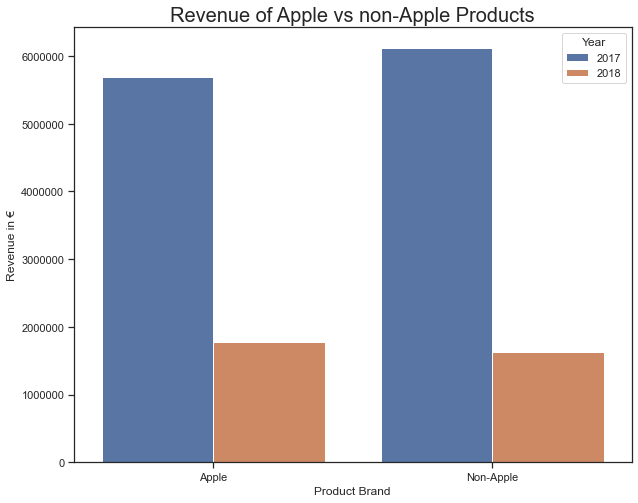

In [45]:
apple_prod = (
    main
        .assign(apple = lambda df: np.where(df['brand'] == 'Apple', 'Apple', 'Non-Apple'),
                year = lambda df: df['date'].dt.strftime('%Y'))
        .groupby(['year', 'apple'])
        .agg(total_revenue = ('disc_total_price', 'sum'))
        .reset_index()
    )

plt.subplots(figsize = (10, 8))

sns.barplot(
    data = apple_prod,
    x = 'apple',
    y = 'total_revenue',
    hue = 'year',
)
plt.xlabel('Product Brand')
plt.ylabel('Revenue in €')
plt.legend(title = 'Year')
plt.title('Revenue of Apple vs non-Apple Products', fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig(R'visualisations\apple\apple_vs_nonapple_revenue.svg')
plt.show()

### Ratio of discounted/total Apple products sold vs total Apple products sold

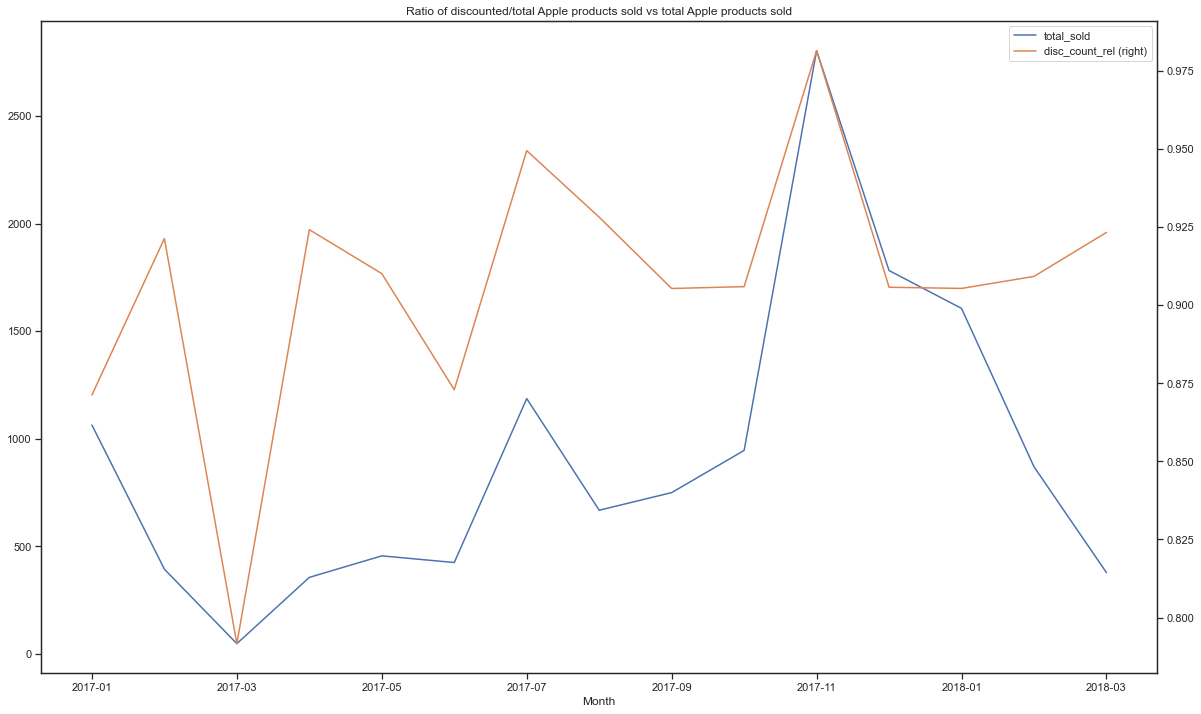

In [46]:
# prepare data for plotting
apple = (
main
    .query('brand == "Apple"')
    .assign(yearmonth = lambda df: df['date'].dt.strftime('%Y-%m'),
            is_disc = lambda df: np.where(df['total_disc'] > 0, True, False))
    .groupby(['yearmonth'])
    .agg(total_sold= ('order_id', 'count'), disc_count = ('is_disc', 'sum'))
    .reset_index()
    .assign(disc_count_rel = lambda df: df['disc_count'] / df['total_sold'])
)

# create plot
fig, ax = plt.subplots(figsize=(20, 12))

apple.plot(
    x='yearmonth',
    y='total_sold',
    ax=ax
)

apple.plot(
    x='yearmonth',
    y='disc_count_rel',
    ax = ax, 
    secondary_y = True 
)

ax.set_xlabel('Month')
plt.title('Ratio of discounted/total Apple products sold vs total Apple products sold') 
plt.ticklabel_format(style='plain', axis='y') 

plt.savefig(R'visualisations\apple\apple_vs_nonapple_revenue.svg')
plt.show()

### Total Apple Revenue vs. Total Apple Discounts

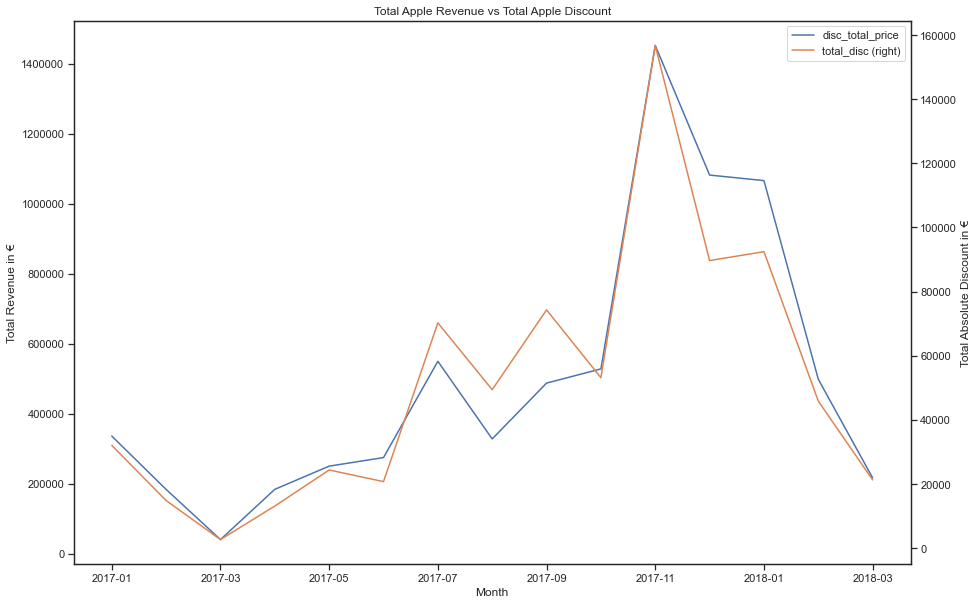

In [47]:
tmp_df = (
main
    .query('brand == "Apple"')
    .assign(yearmonth = main['date'].dt.strftime('%Y-%m'))
    .groupby(['yearmonth'])
    .agg({'disc_total_price':'sum', 'total_disc': 'sum'})
    .reset_index()
)

fig, ax = plt.subplots(figsize=(15, 10))

tmp_df.plot(
    x='yearmonth',
    y='disc_total_price',
    ax=ax
)

tmp_df.plot(
    x='yearmonth',
    y='total_disc',
    ax = ax, 
    secondary_y = True 
)

sns.set()
plt.title('Total Apple Revenue vs Total Apple Discount') 
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue in €')
plt.ylabel('Total Absolute Discount in €')
ax.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='y') 

plt.savefig(R'visualisations\apple\total_apple_rev_vs_total_apple_disc.svg')
plt.show() 

### Average Apple discount in percent vs. Total Apple Revenue per week

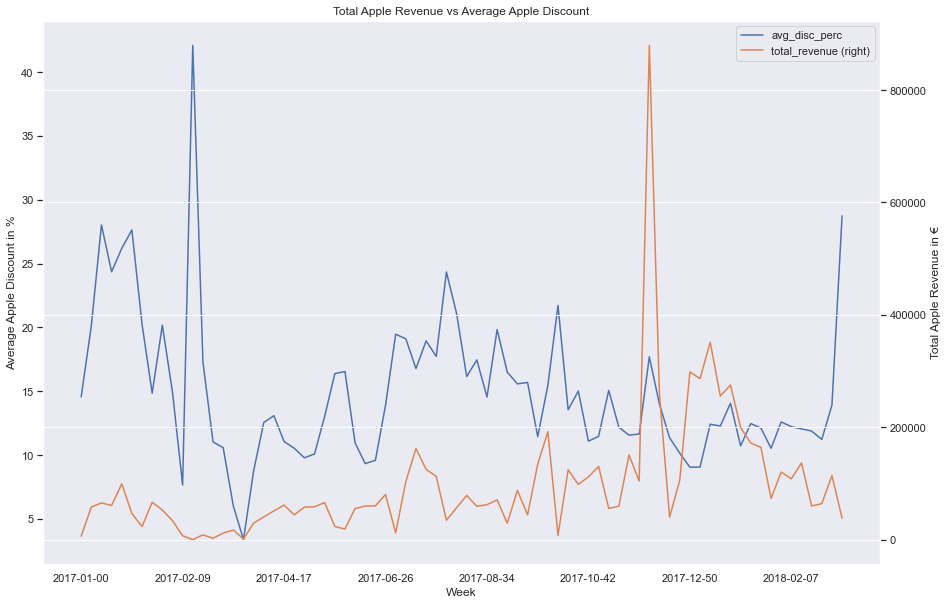

In [48]:
tmp_df = (
main
    .query('brand == "Apple"')
    .assign(yearmonthweek = main['date'].dt.strftime('%Y-%m-%W'))
    .groupby(['yearmonthweek'])
    .agg(avg_disc_perc = ('disc_perc', 'mean'), total_revenue = ('disc_total_price', 'sum'))
    .reset_index()
)

fig, ax = plt.subplots(figsize=(15, 10))

tmp_df.plot(
    x='yearmonthweek',
    y='avg_disc_perc',
    ax=ax
)

tmp_df.plot(
    x='yearmonthweek',
    y='total_revenue',
    ax = ax, 
    secondary_y = True
)

sns.set()
plt.title('Total Apple Revenue vs Average Apple Discount') 
ax.set_xlabel('Week')
ax.set_ylabel('Average Apple Discount in %')
plt.ylabel('Total Apple Revenue in €')
ax.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='y') 

plt.savefig(R'visualisations\apple\avg_apple_disc_vs_total_apple_rev_weekly.svg')
plt.show() 

# Conclusions

Conclusions can be found in the presentation file. 